In [292]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt

In [293]:
# Read the data
customer_df=pd.read_csv("Customers.csv")
transactions_df=pd.read_csv("Transactions.csv")

### Data Description

1. customers data

* CustomerID: Unique identifier for each customer.
* CustomerName: Name of the customer.
* Region: Continent where the customer resides.
* SignupDate: Date when the customer signed up.

2. Transactions data

* TransactionID: Unique identifier for each transaction.
* CustomerID: ID of the customer who made the transaction.
* ProductID: ID of the product sold.
* TransactionDate: Date of the transaction.

### View Data

In [294]:
#Customer data
customer_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [295]:
# Transaction data
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


### Data Preprocessing 

In [296]:
# Check for missing values
print(f'The number of missing values in customer data: {customer_df.isnull().sum().sum()}')
print(f'The number of missing values in transactions data: {transactions_df.isnull().sum().sum()}')

# Merge customer data with transaction data
customer_data = customer_df.merge(transactions_df, on='CustomerID')

The number of missing values in customer data: 0
The number of missing values in transactions data: 0


In [297]:
customer_data.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64


### Feature Engineering

In [298]:
#Calculate customer spending
customer_spending = customer_data.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_data = customer_data.merge(customer_spending, on='CustomerID')
customer_data.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue_x,Price,TotalValue_y
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,3354.52
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,3354.52
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,3354.52
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,3354.52
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,3354.52


In [299]:
customer_data['Total spending']=customer_data['TotalValue_y']
customer_data=customer_data.drop(columns=['TotalValue_y'])
customer_data.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue_x,Price,Total spending
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,3354.52
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,3354.52
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,3354.52
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,3354.52
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,3354.52


In [300]:
# Calculate customer transaction frequency
customer_frequency = customer_data.groupby('CustomerID')['TransactionID'].count().reset_index()
customer_data = customer_data.merge(customer_frequency, on='CustomerID')
customer_data.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID_x,ProductID,TransactionDate,Quantity,TotalValue_x,Price,Total spending,TransactionID_y
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,3354.52,5
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,3354.52,5
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,3354.52,5
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,3354.52,5
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,3354.52,5


In [301]:
customer_data['Frequency']=customer_data['TransactionID_y']
customer_data=customer_data.drop(columns=['TransactionID_y'])
customer_data.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID_x,ProductID,TransactionDate,Quantity,TotalValue_x,Price,Total spending,Frequency
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,3354.52,5
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,3354.52,5
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,3354.52,5
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,3354.52,5
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,3354.52,5


In [302]:
# Calculate customer recency 
customer_data['TransactionDate'] = pd.to_datetime(customer_data['TransactionDate'])
recent_date = customer_data['TransactionDate'].max()
customer_data['Recency'] =(recent_date- customer_data['TransactionDate']).dt.days 

In [303]:
customer_data.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID_x,ProductID,TransactionDate,Quantity,TotalValue_x,Price,Total spending,Frequency,Recency
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,3354.52,5,344
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,3354.52,5,102
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,3354.52,5,264
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,3354.52,5,235
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,3354.52,5,55


In [304]:
# Select relevant features
customer_features = customer_data.groupby('CustomerID').agg({
    'Total spending': 'sum',  # Total spending
    'Frequency': 'count',  # Transaction frequency
    'Recency': 'max'  # Recency
}).reset_index()

In [305]:
customer_features.head()

,CustomerID,Total spending,Frequency,Recency
0,C0001,16772.60,5,344
1,C0002,7450.96,4,304
2,C0003,10901.52,4,314
3,C0004,42839.04,8,304
4,C0005,6102.72,3,288


In [306]:
customer_features.isnull().sum()

CustomerID        0
Total spending    0
Frequency         0
Recency           0
dtype: int64

In [307]:
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['Recency', 'Frequency', 'Total spending']])


# Create a DataFrame with standardized features
customer_features_scaled = pd.DataFrame(scaled_features, columns=['Recency', 'Frequency', 'Total spending'], index=customer_features['CustomerID'])

### Clustering (K-Means)

In [308]:
# Define a range of cluster numbers to evaluate
k_range = range(2, 11)
db_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_features_scaled)
    db_scores.append(davies_bouldin_score(customer_features_scaled, kmeans.labels_))

# Find the optimal number of clusters based on DB index
optimal_k = k_range[db_scores.index(min(db_scores))]

# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features_scaled['Cluster'] = kmeans.fit_predict(customer_features_scaled)

# Merge cluster labels with original customer data
customer_data_with_cluster = customer_features.merge(customer_features_scaled[['Cluster']], on='CustomerID')

#### DB Score

In [313]:
print(f"Optimal Number od clusters: {optimal_k}")

Optimal Number od clusters: 9


In [314]:
print(f"DB Index values for the optimal clusters:{db_scores}")

DB Index values for the optimal clusters:[0.8828066383884187, 0.8647152149056616, 0.8952016744114718, 1.0477636861231727, 0.8834659092346687, 0.8898422337471715, 0.8424161232322439, 0.7934212518253618, 0.8026016828791069]


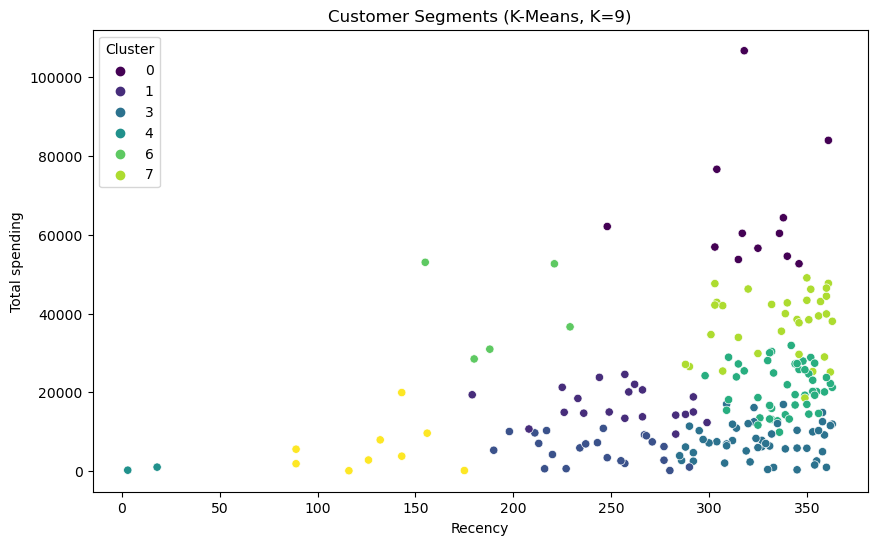

In [315]:
# Visualize clusters 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Total spending', hue='Cluster', data=customer_data_with_cluster, palette='viridis')
plt.title(f'Customer Segments (K-Means, K={optimal_k})')
plt.xlabel('Recency')
plt.ylabel('Total spending')
plt.show()